# Human Development Index and Components

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

## Read Data

In [2]:
data = pd.read_csv('dataset/Human.csv', encoding='latin-1', delimiter=',', quotechar='"')

In [3]:
data.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Unnamed: 10,Unnamed: 11
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3,NaN,NaN
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1,NaN,NaN
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2,NaN,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4,NaN,NaN
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5,NaN,NaN


In [4]:
data.shape

(195, 12)

In [5]:
data['HUMAN DEVELOPMENT'].value_counts()

VERY HIGH     66
HIGH          49
MEDIUM        44
LOW           32
OTHER          4
Name: HUMAN DEVELOPMENT, dtype: int64

In [6]:
data.groupby('HUMAN DEVELOPMENT').mean()

,HDI rank,Life expectancy at birth,Unnamed: 10,Unnamed: 11
HUMAN DEVELOPMENT,,,,
HIGH,90.693878,72.093878,NaN,NaN
LOW,175.437500,61.056250,NaN,NaN
MEDIUM,137.340909,66.775000,NaN,NaN
OTHER,193.500000,69.525000,NaN,NaN
VERY HIGH,33.318182,78.736364,NaN,NaN


## Analysis Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [8]:
data.describe()

,HDI rank,Life expectancy at birth,Unnamed: 10,Unnamed: 11
count,195.000000,195.000000,0.0,0.0
mean,97.815385,71.277949,NaN,NaN
std,56.467551,7.746484,NaN,NaN
min,1.000000,52.500000,NaN,NaN
25%,49.500000,65.700000,NaN,NaN
50%,97.000000,71.700000,NaN,NaN
75%,146.000000,76.700000,NaN,NaN
max,195.000000,85.900000,NaN,NaN


In [9]:
countries = data['Country'].unique()

In [10]:
countries.shape

(195,)

### Missed Value

In [26]:
data.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

KeyError: "['Unnamed: 10' 'Unnamed: 11'] not found in axis"

In [ ]:
data.isnull().values.sum()

In [27]:
data.isnull().sum()

HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
dtype: int64

In [28]:
data = data.fillna(data.median())

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [29]:
data = data.dropna(axis=0)

In [30]:
data['Human Development Index (HDI) ']

0      0.962
1      0.961
2      0.959
3      0.952
4      0.951
       ...  
190    0.385
191       ..
192       ..
193       ..
194       ..
Name: Human Development Index (HDI) , Length: 195, dtype: object

In [31]:
data.duplicated(keep='first').sum()

0

In [32]:
data.duplicated(keep='last').sum()

0

In [33]:
data

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5
...,...,...,...,...,...,...,...,...,...,...
190,191,South Sudan,LOW,0.385,55.0,5.5,5.7,768,-1,191
191,192,Korea (Democratic People's Rep. of),OTHER,..,73.3,10.8,..,..,..,..
192,193,Monaco,OTHER,..,85.9,..,..,..,..,..
193,194,Nauru,OTHER,..,63.6,11.7,..,"17,730",..,..


In [34]:
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [35]:
data.interpolate(method='linear', inplace=True, axis=0)

### Convert data type

In [36]:
def df_convert_dtype(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [37]:
numerical_data = data.iloc[:, 3:]

In [38]:
numerical_data.head()

,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,0.962,84.0,16.5,13.9,"66,933",5,3
1,0.961,83.2,18.2,13.0,"64,660",6,1
2,0.959,82.7,19.2,13.8,"55,782",11,2
3,0.952,85.5,17.3,12.2,"62,607",6,4
4,0.951,84.5,21.1,12.7,"49,238",18,5


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 16.8+ KB


In [40]:
converted_columns = numerical_data.select_dtypes(np.object_).columns

In [41]:
converted_columns

Index(['Human Development Index (HDI) ', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank.1'],
      dtype='object')

In [42]:
data['Gross national income (GNI) per capita'] = data['Gross national income (GNI) per capita'].str.replace(',', '.')

In [43]:
data[converted_columns] = df_convert_dtype(data[converted_columns], np.object_, np.float64)

ValueError: could not convert string to float: '..'

In [44]:
numerical_data_cols = numerical_data.columns

In [45]:
corr = data.corr()

### Visualation Data

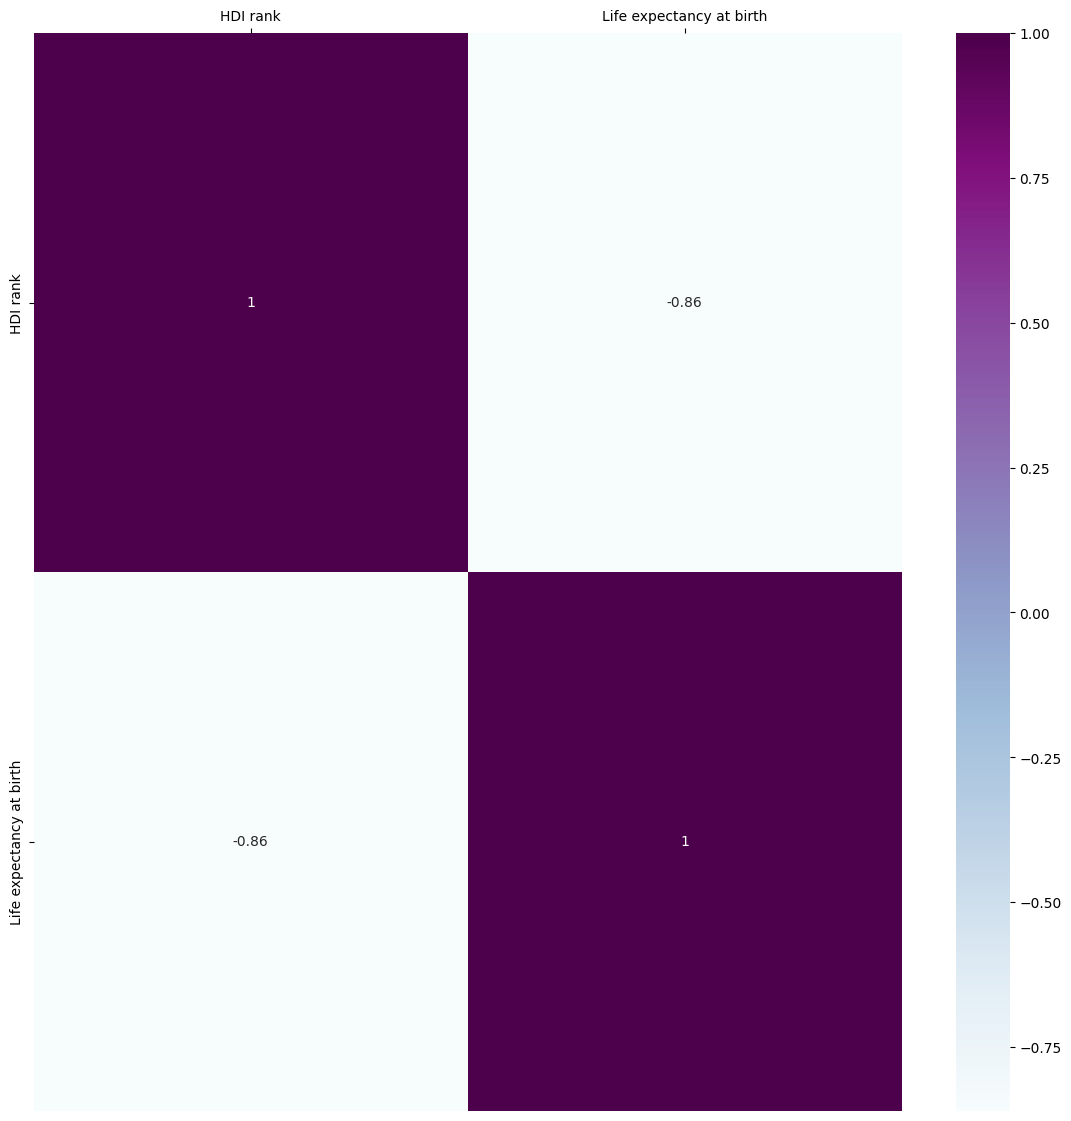

In [46]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(corr, annot=True, cmap=plt.cm.BuPu)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

In [47]:
data.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66.933,5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64.660,6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55.782,11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62.607,6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49.238,18,5


In [48]:
data = data.drop('HDI rank.1', axis=1)

In [49]:
data.set_index('HDI rank', inplace=True)

In [50]:
regions = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (Kingdom of)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
     'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea (Democratic People\'s Republic of)', 'Korea (Republic of)', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palau', 'Philippines', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
     'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
     'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'The Caribbean': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Guyana', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago'],
     'North America': ['Canada', 'United States'],
    'Central America': ['Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama'],
    'South America': ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela (Bolivarian Republic of)']
}
data['Region'] = data['Country'].map({country: region for region, countries in regions.items() for country in countries})

In [51]:
data.head()

,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Region
HDI rank,,,,,,,,,
1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66.933,5,Europe
2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64.660,6,Europe
3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55.782,11,Europe
4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62.607,6,NaN
5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49.238,18,Oceania


In [52]:
data.groupby('Region')['Life expectancy at birth'].mean().round()

Region
Africa             63.0
Asia               73.0
Central America    72.0
Europe             79.0
North America      80.0
Oceania            70.0
South America      73.0
The Caribbean      72.0
Name: Life expectancy at birth, dtype: float64

In [53]:
data['Expected years of schooling'] = data['Expected years of schooling'].replace('..', np.nan).str.replace(',', '').astype(float)


In [54]:
data.groupby('Region')['Expected years of schooling'].mean()

Region
Africa             10.974510
Asia               13.302326
Central America    12.928571
Europe             16.232500
North America      16.350000
Oceania            13.364286
South America      15.210000
The Caribbean      13.925000
Name: Expected years of schooling, dtype: float64

In [55]:
data.describe()

,Life expectancy at birth,Expected years of schooling
count,195.000000,193.000000
mean,71.277949,13.506736
std,7.746484,2.920314
min,52.500000,5.500000
25%,65.700000,11.500000
50%,71.700000,13.400000
75%,76.700000,15.600000
max,85.900000,21.100000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 195 non-null    object 
 1   HUMAN DEVELOPMENT                       195 non-null    object 
 2   Human Development Index (HDI)           195 non-null    object 
 3   Life expectancy at birth                195 non-null    float64
 4   Expected years of schooling             193 non-null    float64
 5   Mean years of schooling                 195 non-null    object 
 6   Gross national income (GNI) per capita  195 non-null    object 
 7   GNI per capita rank minus HDI rank      195 non-null    object 
 8   Region                                  185 non-null    object 
dtypes: float64(2), object(7)
memory usage: 15.2+ KB


In [57]:
data['Gross national income (GNI) per capita'] = data['Gross national income (GNI) per capita'].replace('..', np.nan).str.replace(',', '').astype(float)
data.groupby('Region')['Gross national income (GNI) per capita'].mean()

Region
Africa             52.791000
Asia               21.611163
Central America    13.252714
Europe             43.419925
North America      55.786500
Oceania            12.518571
South America      14.334000
The Caribbean      14.644500
Name: Gross national income (GNI) per capita, dtype: float64

In [58]:
data['Human Development Index (HDI) '] = data['Human Development Index (HDI) '].replace('..', np.nan).str.replace(',', '').astype(float)
data.groupby('Region')['Human Development Index (HDI) '].mean()

Region
Africa             0.558020
Asia               0.736070
Central America    0.708857
Europe             0.883100
North America      0.928500
Oceania            0.699846
South America      0.761400
The Caribbean      0.741250
Name: Human Development Index (HDI) , dtype: float64

In [59]:
data['GNI per capita rank minus HDI rank'] = data['GNI per capita rank minus HDI rank'].replace('..', np.nan).astype(float)
data.groupby('Region')['GNI per capita rank minus HDI rank'].mean()

Region
Africa             -5.529412
Asia               -2.000000
Central America    -5.571429
Europe              3.150000
North America      -2.500000
Oceania            14.153846
South America       5.800000
The Caribbean       0.750000
Name: GNI per capita rank minus HDI rank, dtype: float64

<AxesSubplot:xlabel='Human Development Index (HDI) '>

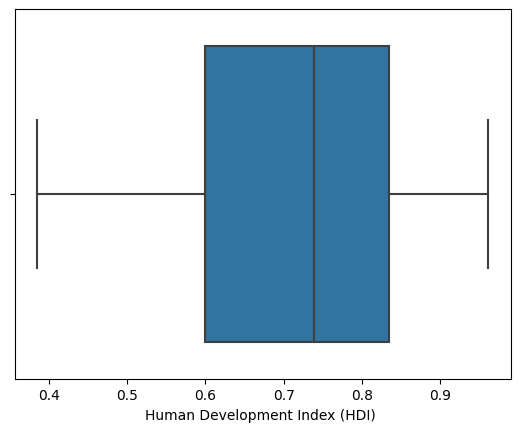

In [60]:
sns.boxplot(x=data['Human Development Index (HDI) '])

In [71]:
def boxplot_columns(df):
    
    cols = df.select_dtypes(np.number).columns
    for col in cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(x=data[col])
        

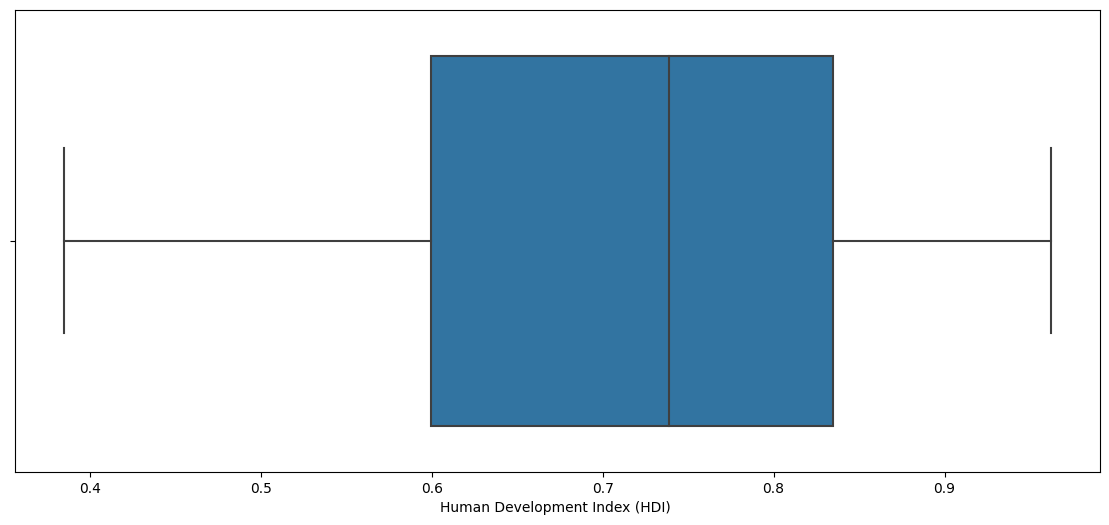

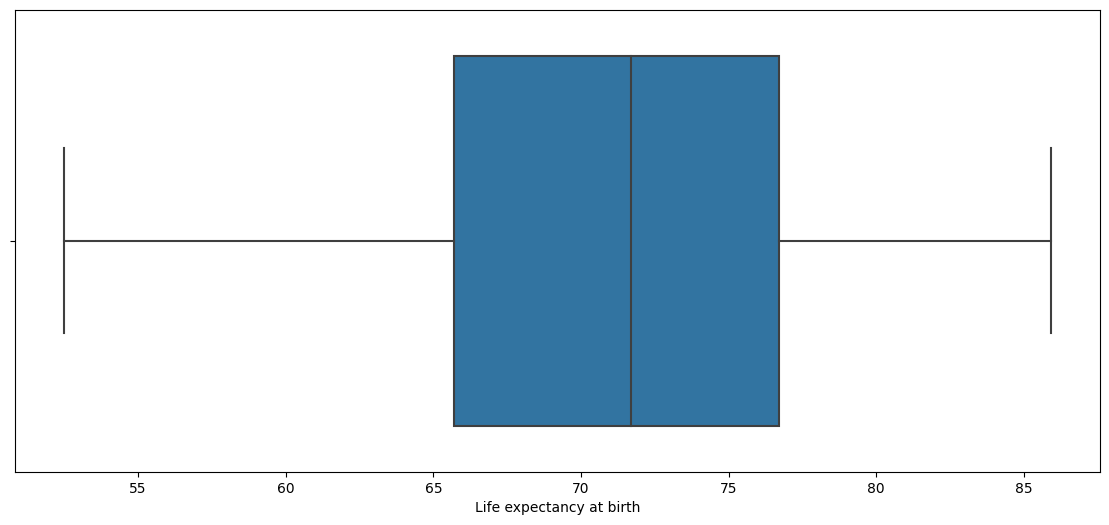

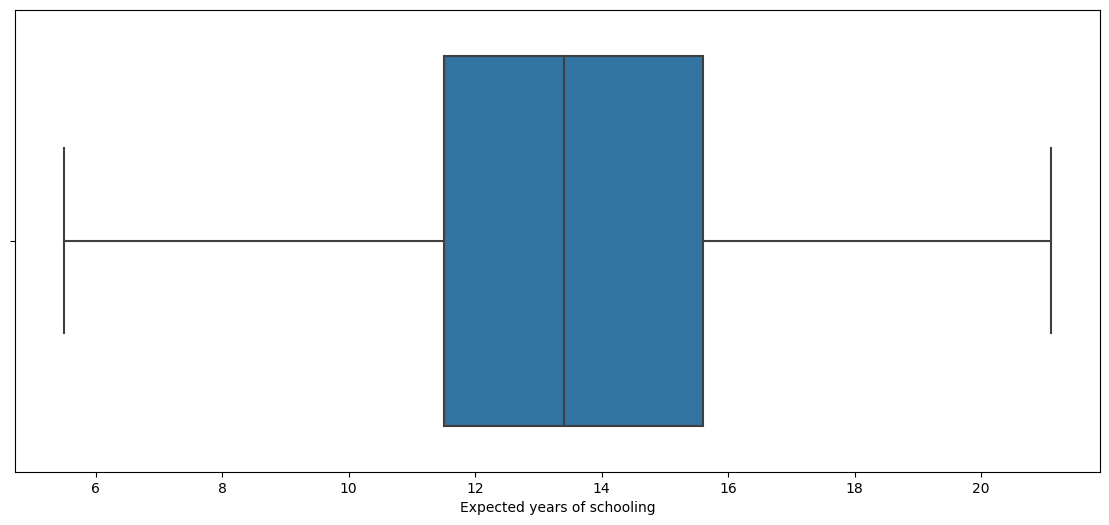

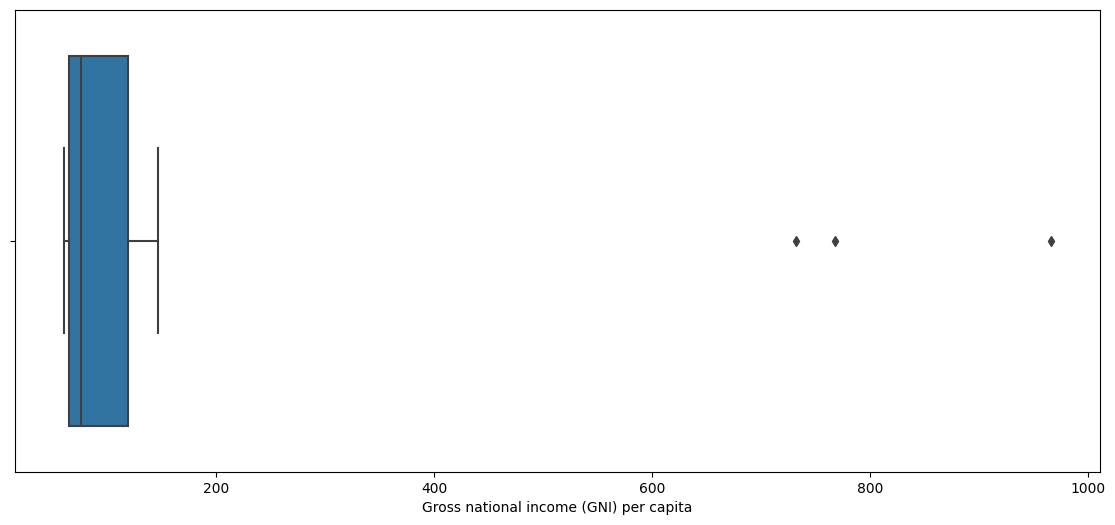

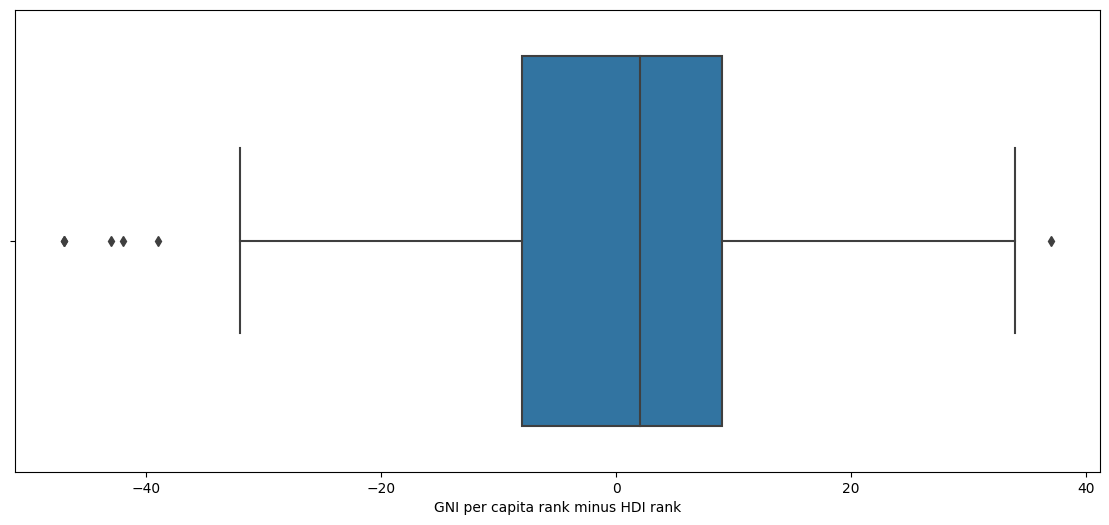

In [72]:
boxplot_columns(data)

<AxesSubplot:xlabel='Gross national income (GNI) per capita'>

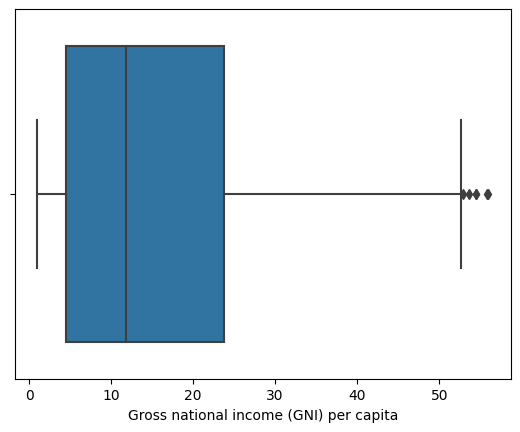

In [69]:
gross_notional = data.loc[data['Gross national income (GNI) per capita'] < 60, 'Gross national income (GNI) per capita']
sns.boxplot(x=gross_notional)

In [70]:
data.loc[data['Gross national income (GNI) per capita'] < 60, 'Gross national income (GNI) per capita'] = np.nan